# Q-Learning

**Q-learning** es un algoritmo sin modelo, basado en valores y fuera de política que encontrará la mejor serie de acciones basándose en el estado actual del agente. La "Q" significa calidad. La calidad representa el valor de la acción para maximizar las recompensas futuras.     

Los *algoritmos basados en modelos* utilizan funciones de transición y recompensa para estimar la política óptima y crear el modelo. En cambio, los *algoritmos sin modelo* aprenden las consecuencias de sus acciones a través de la experiencia sin función de transición y recompensa. 

El método *basado en el valor* entrena la función de valor para aprender qué estado es más valioso y actuar. Por otro lado, los métodos *basados en políticas* entrenan directamente la política para aprender qué acción tomar en un estado determinado.

En la *política desactivada*, el algoritmo evalúa y actualiza una política que difiere de la política utilizada para realizar una acción. Por el contrario, el algoritmo *on-policy* evalúa y mejora la misma política utilizada para realizar una acción.  

![Bellman_1](https://user-images.githubusercontent.com/44867923/141013004-bde1b971-fcdc-445e-bf08-9bc89311891c.jpg)
![Bellman_2](https://user-images.githubusercontent.com/44867923/141012134-09ff0d88-4ce9-43af-8b04-d535cf24d897.jpg)

Analizaremos el aprendizaje Q (Q-Learning) utilizando el ejemplo del entorno de un lago helado (Frozen-Lake). En este entorno, el agente debe cruzar el lago helado desde el inicio hasta la meta, sin caer en los agujeros. La mejor estrategia es alcanzar los objetivos por el camino más corto. 

<img src="./IMG/Q_Learning_Final.avif" alt="Q_Learning_Final" width="400"/>

## Tabla Q   
El agente utilizará una tabla Q para tomar la mejor acción posible en función de la recompensa esperada para cada estado del entorno. En palabras sencillas, una tabla Q es una estructura de datos de conjuntos de acciones y estados, y utilizamos el algoritmo de aprendizaje Q para actualizar los valores de la tabla. 



## Función Q   
La función Q utiliza la ecuación de Bellman y toma como entrada el estado(s) y la acción(a). La ecuación simplifica el cálculo de los valores de estado y de estado-acción.   

<img src="./IMG/Bellman_Equation.avif">

## Algoritmo de aprendizaje Q   
<img src="./IMG/Q_Learning_Process.avif">


## Inicializando la tabla Q   

Primero se inicializa la tabla Q. Se construye la tabla con columnas basadas en el número de acciones y filas basadas en el número de estados.

En este ejemplo, el personaje puede moverse hacia arriba, abajo, izquierda y derecha. Se dispone de cuatro acciones posibles y cuatro estados (inicio, inactivo, camino equivocado y fin). También se puede considerar el camino equivocado para caer en el agujero.    

Se inicializa la tabla Q con valores a 0.    


<img src="./IMG/Q_Table_1.avif" width=400>

En el ejemplo del lago helado, el agente desconoce el entorno, por lo que realiza una acción aleatoria (moverse hacia abajo) para empezar. Como se puede ver en la imagen anterior, la tabla Q se actualiza utilizando la ecuación de Bellman.

## Medir las recompensas
Después de emprender la acción, se mide el resultado y la recompensa. 

La recompensa por alcanzar el objetivo es +1
La recompensa por tomar el camino equivocado (caer en el agujero) es 0
La recompensa por inactividad o movimiento en el lago helado también es 0.    

## Actualizar tabla Q
Se actualiza la función Q(St,At) mediante la ecuación. Utiliza los valores Q estimados del episodio anterior, la tasa de aprendizaje y el error de Diferencias Temporales. El error de diferencias temporales se calcula utilizando la recompensa inmediata, la recompensa futura máxima esperada descontada y el valor Q de la estimación anterior. 

El proceso se repite varias veces hasta que se actualiza la tabla Q y se maximiza la función de valor Q.    

<img src="./IMG/Q_learning_equation.avif">

Al principio, el agente está explorando el entorno para actualizar la tabla Q. Y cuando la Q-Table esté lista, el agente empezará a explotar y a tomar mejores decisiones.   

<img src="./IMG/Q_Table_3.avif" width=400>   


En el caso de un lago helado, el agente aprenderá a tomar el camino más corto para llegar a la meta y evitar saltar a los agujeros. 

## Aplicación programática - Parte I: Desarrollo teórico

### Importando librerías necesarias.

In [1]:
import gymnasium as gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Creando entorno: "Frozen-Lake" estocástico

In [2]:
env = gym.make("FrozenLake-v1", is_slippery=True)

In [3]:
ALPHA = 0.1
GAMMA = 0.9
EPISODES = 10000
EPSILON = 0.9
DELTA_EPSILON = EPSILON / EPISODES
MIN_EPSILON = 0.1

### Creando la Tabla Q: Un valor de cada acción en cada estado.

In [4]:
Q = np.zeros((env.observation_space.n, env.action_space.n))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Agente: jugando en el entorno y actualizando la tabla Q

In [5]:
for ep in range(EPISODES):
    obs, _ = env.reset()
    done = False
    EPSILON = max(EPSILON - DELTA_EPSILON, MIN_EPSILON)
    while not done:
        
        # Select Action
        if EPSILON < np.random.rand():
            action = env.action_space.sample() # Random action: Exploration
        else:
            action = np.argmax(Q[obs])  # Best action: Exploitation

        next_obs, reward, done, _ , _  = env.step(action)
        
        # Update Q value for this action in this observation
        actual_obs_action_value = Q[obs, action]
        best_next_obs_action_value = reward + GAMMA * Q[next_obs].max() - actual_obs_action_value
        Q[obs, action] = actual_obs_action_value + ALPHA * best_next_obs_action_value
        
        obs = next_obs

### Graficando la Tabla Q*: valor de acción más alto para cada estado (```Q.max()```)

<Axes: >

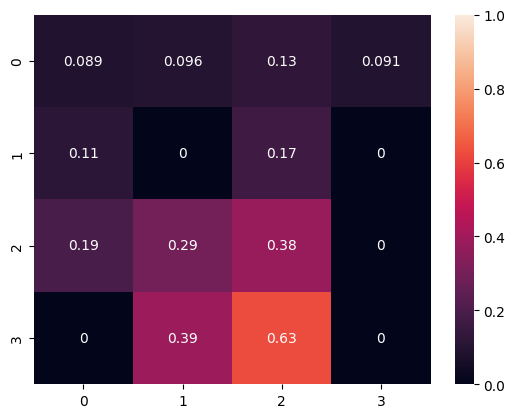

In [6]:
sns.heatmap(data=Q.max(axis=1).reshape(4,4), annot=True, vmax=1)

### Graficando Tabla Q*: acción con mayor valor para cada estado (```np.argmax()```)

<Axes: >

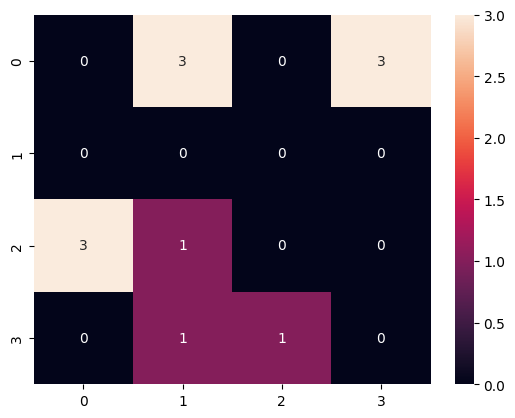

In [7]:
sns.heatmap(data=np.argmax(Q, axis=1).reshape(4,4), annot=True)

### Graficando Tabla Q: valor de estado para cada acción

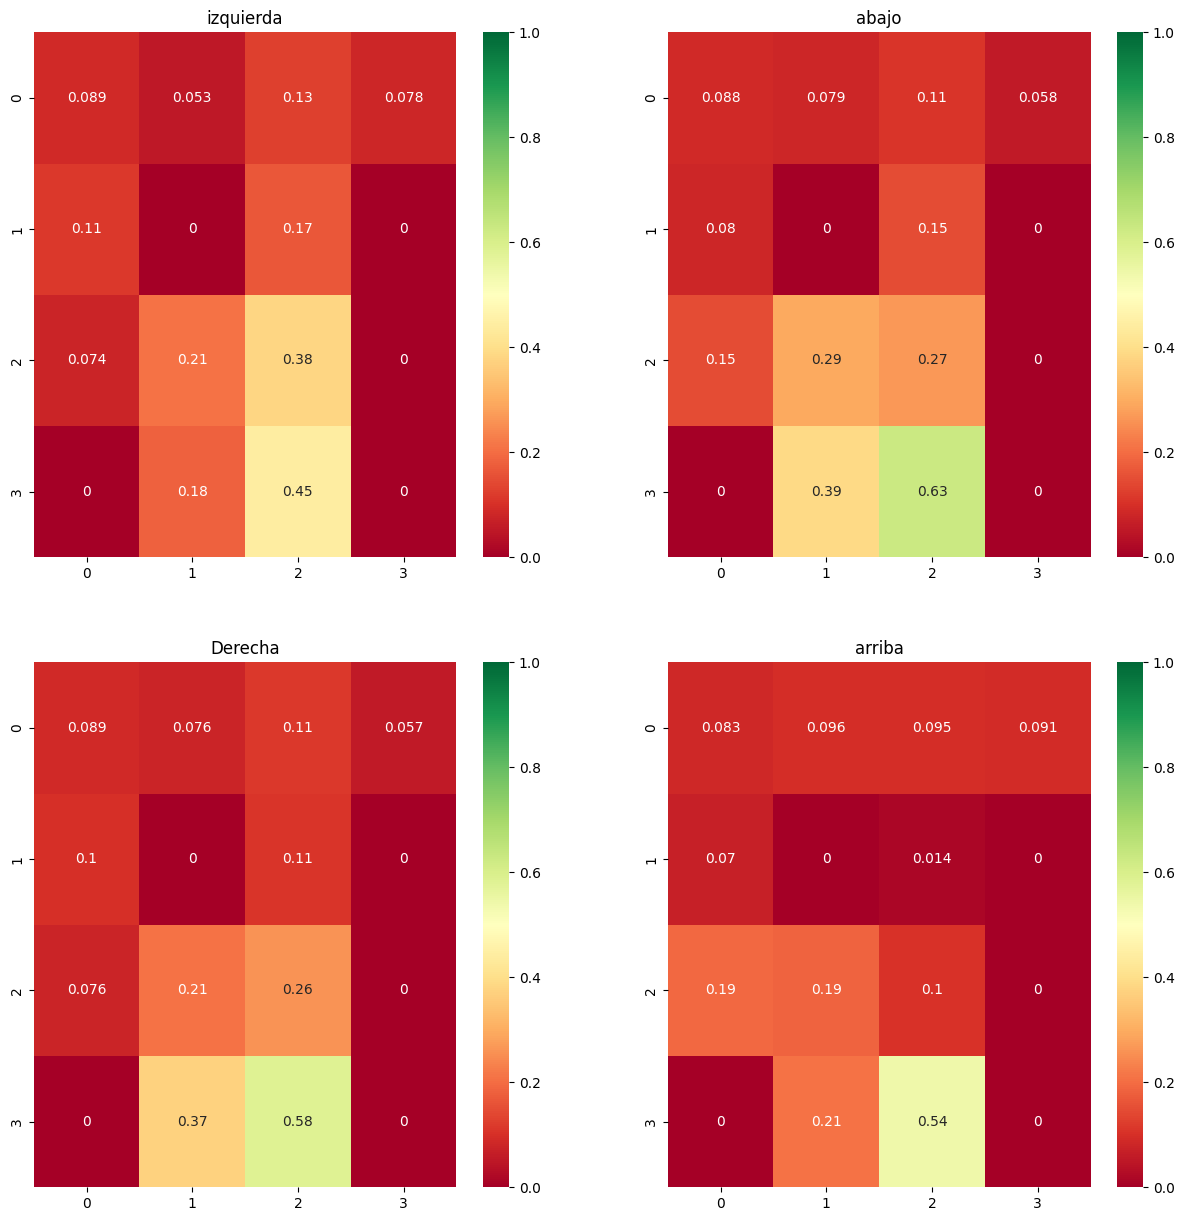

In [8]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

plot = ax[0,0]
plot.set_title("izquierda")
values = Q.T[0].reshape(4,4)
sns.heatmap(values, cmap="RdYlGn", annot=True, ax=plot, vmax=1)

plot = ax[0,1]
plot.set_title("abajo")
values = Q.T[1].reshape(4,4)
sns.heatmap(values, cmap="RdYlGn", annot=True, ax=plot, vmax=1)

plot = ax[1,0]
plot.set_title("Derecha")
values = Q.T[2].reshape(4,4)
sns.heatmap(values, cmap="RdYlGn", annot=True, ax=plot, vmax=1)

plot = ax[1,1]
plot.set_title("arriba")
values = Q.T[3].reshape(4,4)
sns.heatmap(values, cmap="RdYlGn", annot=True, ax=plot, vmax=1)

_ = plt.plot()

## Aplicación programática - Parte II: Desarrollo práctico 

### Preparación   

#### Configuración de la pantalla virtual   

Primero instalaremos todas las dependencias para generar un vídeo de reproducción (Gif). Necesitaremos una pantalla virtual (pyvirtualdisplay) para renderizar el entorno y grabar los fotogramas. 

**Nota**: al utilizar `%%capture` estamos suprimiendo la salida de la celda Jupyter. 

````
pip install pyglet==1.5.1
apt install python-opengl -- o -- pip install pyopengl
apt install ffmpeg -- o -- pip install ffmpeg
apt install xvfb (primero hacer un apt update)
pip3 install pyvirtualdisplay    
````


In [1]:
%%capture

# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

#### Instalar librerías necesarias

```
%%capture
pip install gymnasium
pip install pygame

pip install imageio imageio_ffmpeg   
```

#### Importamos librerías

In [2]:
import numpy as np
import gymnasium as gym
import random
import imageio
from tqdm.notebook import trange # Usado para mostrar una barra de progreso

#### Entorno **"Frozen Lake"**   

Se va a crear un entorno 4x4 antideslizante utilizando la librería de gymnasium y seleccionando el entorno **Frozen Lake**. 

Hay dos versiones de cuadrícula, "4x4" y "8x8".
Si `is_slippery=True`, es posible que el agente no se mueva en la dirección prevista debido a la naturaleza resbaladiza del lago helado.    

Tras inicializar el entorno, se realiza un análisis 'medioambiental'. 

In [3]:
env = gym.make("FrozenLake-v1",map_name="4x4",is_slippery=False, render_mode="rgb_array")

print("Espacio de observación: ", env.observation_space) # Muestra el espacio de observación
print("Observación de ejemplo: ", env.observation_space.sample()) # Muetsra una observación de ejemplo

Espacio de observación:  Discrete(16)
Observación de ejemplo:  0


Hay 16 espacios únicos en el entorno que se muestran en posiciones aleatorias.    

Se lista el número de acciones y se muestra la acción aleatoria. 

El espacio de acción:

- 0: mover a la izquierda
- 1: bajar
- 2: mover a la derecha
- 3: ascender   

Función de recompensa:

- Alcanzar el objetivo: +1
- Cayendo en el agujero: 0
- Permanecer en el lago helado: 0

In [4]:
print("Espacio de acción: ", env.action_space.n) # Muestra el espacio de acción
print("Muestra acción de ejemplo: ", env.action_space.sample()) # Muestra una acción de ejemplo

Espacio de acción:  4
Muestra acción de ejemplo:  2


#### Crear e inicializar la tabla Q   

La tabla Q tiene columnas como acciones y filas como estados. Podemos utilizar ***Gymnasium*** para encontrar el espacio de acción y el espacio de estado. A continuación, utilizaremos esta información para crear la tabla Q. 

In [5]:
state_space = env.observation_space.n
print("Existen ", state_space, " posibles estados.")

action_space = env.action_space.n
print("Existen ", action_space, " posibles acciones.")

Existen  16  posibles estados.
Existen  4  posibles acciones.


Para inicializar la Q-Table, es necesario crear un array Numpy de **state_space** y **action_space**. Se crea una matriz de 16 X 4. 

In [6]:
def initialize_q_table(state_space, action_space):
  Qtable = np.zeros((state_space, action_space))
  return Qtable

Qtable_frozenlake = initialize_q_table(state_space, action_space)

#### Política Epsilon-greedy
La estrategia **Epsilon-greedy** maneja los compromisos de exploración y explotación. Con una probabilidad de 1 - ɛ, se realiza explotación, y con la probabilidad ɛ, se realiza exploración. 

En la *epsilon_greedy_policy* se secuenciará como sigue:

1. Genera el número aleatorio entre 0 y 1.
2. Si el número aleatorio es mayor que épsilon, haremos explotación. Significa que el agente tomará la acción con el valor más alto dado un estado.
3. Si no, haremos exploración (Tomar acciones al azar). 

In [7]:
def epsilon_greedy_policy(Qtable, state, epsilon):
  random_int = random.uniform(0,1)
  if random_int > epsilon:
    action = np.argmax(Qtable[state])
  else:
    action = env.action_space.sample()
  return action

#### Definir la política codiciosa  (**Greedy policy**) 

Como se ha comentado, *Q-learning* es un algoritmo off-policy, lo que significa que la política de acción y la función de actualización son diferentes. 

En este ejemplo, la política *Epsilon Greedy* es la política de actuación, y la política Greedy es la política de actualización. 

La política Greedy también será la política final cuando se entrene al agente. Se utiliza para seleccionar el valor de estado y acción más alto de la tabla Q.

In [8]:
def greedy_policy(Qtable, state):
  action = np.argmax(Qtable[state])
  return action

#### Hiperparámetros del modelo    

Estos hiperparámetros se utilizan en el bucle de entrenamiento, y afinarlos te dará mejores resultados. 

El Agente necesita explorar suficiente espacio de estados para aprender una buena aproximación de valores; es necesario tener un decaimiento progresivo de épsilon.    
Si la tasa de decaimiento es alta, el agente puede quedarse atascado, ya que no ha explorado suficiente espacio de estados.

- Hay 10.000 episodios de formación y 100 de evaluación.
- El índice de aprendizaje es de 0,7.
- Estamos utilizando "FrozenLake-v1" como entorno con 99 pasos máximos por episodio.
- La gamma (tasa de descuento) es 0,95.
- eval_seed: semilla de evaluación para el entorno.
- La probabilidad épsilon de exploración al inicio es 1,0, y la probabilidad mínima será 0,05.
- La tasa de decaimiento exponencial de la probabilidad épsilon es de 0,0005.

In [ ]:
# Parámetros de entrenamiento
n_training_episodes = 10000
learning_rate = 0.7        

# Parámetros de evaluación
n_eval_episodes = 100      

# Parámetros de entorno
env_id = "FrozenLake-v1"   
max_steps = 99             
gamma = 0.95               
eval_seed = []             

# Parámetros de exploración
max_epsilon = 1.0           
min_epsilon = 0.05           
decay_rate = 0.0005           

#### Formación de modelos   

En el bucle de entrenamiento:

1. Crear un bucle para los episodios de formación.
2. Primero reduciremos epsilon. Como cada vez necesitamos menos exploración y más explotación con cada episodio. 
3. Restablece el entorno.
4. Crear un bucle anidado para los pasos máximos.
5. Elija la acción utilizando la política codiciosa épsilon. 
6. Realiza la acción (At) y observa la recompensa esperada(Rt+1) y el estado(St+1).
7. Realiza la acción (a) y observa el estado resultante (s') y la recompensa (r).
8. Actualiza la función Q utilizando la fórmula. 
9. Si `done= True`, termina el episodio y rompe el bucle.
10. Por último, cambia el estado actual por un nuevo estado. 
11. Una vez completados todos los episodios de entrenamiento, la función devolverá la tabla Q actualizada. 

In [ ]:
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
  for episode in trange(n_training_episodes):
 
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    # Reseteo del entorno
    state, _ = env.reset()
    step = 0
    done = False

    # Bucle de entrenamiento
    for step in range(max_steps):
   
      action = epsilon_greedy_policy(Qtable, state, epsilon)

   
      new_state, reward, done, info , _ = env.step(action)

   
      Qtable[state][action] = Qtable[state][action] + learning_rate * (reward + gamma * np.max(Qtable[new_state]) - Qtable[state][action])

      # Si se cumple la condición de parada, el entrenamiento se detiene
      if done:
        break
     
      # Nuestro estado es el nuevo estado
      state = new_state
  return Qtable

In [11]:
Qtable_frozenlake = train(
    n_training_episodes, 
    min_epsilon, 
    max_epsilon, 
    decay_rate, 
    env, 
    max_steps, 
    Qtable_frozenlake)

  0%|          | 0/10000 [00:00<?, ?it/s]

Como se ve a continuación, la Q-Table entrenada tiene valores, y el agente ahora utilizará estos valores para navegar por el entorno y alcanzar el objetivo.  

In [12]:
Qtable_frozenlake

array([[0.73509189, 0.77378094, 0.77378094, 0.73509189],
       [0.73509189, 0.        , 0.81450625, 0.77378094],
       [0.77378094, 0.857375  , 0.77378094, 0.81450625],
       [0.81450625, 0.        , 0.77378094, 0.77378094],
       [0.77378094, 0.81450625, 0.        , 0.73509189],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.        , 0.81450625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.81450625, 0.        , 0.857375  , 0.77378094],
       [0.81450625, 0.9025    , 0.9025    , 0.        ],
       [0.857375  , 0.95      , 0.        , 0.857375  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.95      , 0.857375  ],
       [0.9025    , 0.95      , 1.        , 0.9025    ],
       [0.        , 0.        , 0.        , 0.        ]])

#### Evaluación     

El agente_de_evaluación se ejecuta durante `n_episodios_de_evaluación` y devuelve la media y la desviación estándar de la recompensa. 

1. En el bucle, comprobaremos primero si hay una semilla de evaluación. Si no, entonces reiniciaremos el entorno sin semillas. 
2. El bucle anidado se ejecutará hasta max_steps.
3. El agente tomará la acción que tenga la máxima recompensa futura esperada en un estado dado utilizando Q-Table. 
4. Calcula la recompensa.
5. Cambia el estado.
6. Si ha terminado (el agente cae en el agujero o se ha alcanzado el objetivo), rompa el bucle.
7. Añade los resultados.
8. Al final, utilizaremos estos resultados para calcular la media y la desviación típica. 

In [ ]:
def evaluate_agent(env, max_steps, n_eval_episodes, Q, seed):

  episode_rewards = []
  for episode in range(n_eval_episodes):
    if seed:
      state, _ = env.reset(seed=seed[episode])
    else:
      state, _  = env.reset()
    step = 0
    done = False
    total_rewards_ep = 0
   
    for step in range(max_steps):
      # Tomamos la acción (índice) que tiene la máxima recompensa
      action = np.argmax(Q[state][:])
      new_state, reward, done, info, _ = env.step(action)
      total_rewards_ep += reward
       
      if done:
        break
      state = new_state
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)

  return mean_reward, std_reward

Como se puede ver a continuación, se obtiene la puntuación perfecta con desviación típica cero. Significa que el agente ha alcanzado el objetivo en los 100 episodios. 

In [14]:
# Evaluate our Agent
mean_reward, std_reward = evaluate_agent(env, max_steps, n_eval_episodes, Qtable_frozenlake, eval_seed)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

Mean_reward=1.00 +/- 0.00


#### Visualización del resultado

Hasta ahora, se ha estado jugando con números, y para la demo, es necesario crear un **Gif animado** del agente desde que empieza hasta que llega a la meta.    
Para ello, se siguien los siguientes pasos:

1. Primero se crea el estado reseteando el entorno con un entero aleatorio entre 0 y 500. 
2. A continuación se renderiza el entorno utilizando `"rdb_array"` para crear un array de imágenes. 
3. Luego se añade la `img` al array `images`. 
4. En el bucle, se toma el paso usando la Q-Table y se renderiza la imagen para cada paso. 
5. Por último, se usa este array e `imageio` para crear un **Gif** de un fotograma por segundo. 

In [ ]:
def record_video(env, Qtable, out_directory, fps=1):
  images = [] 
  done = False
  state, _ = env.reset(seed=random.randint(0,500))
  img = env.render()
  images.append(img)
  while not done:
    # Tomamos la acción (índice) que tiene la máxima recompensa futura esperada dado ese estado
    action = np.argmax(Qtable[state][:])
    state, reward, done, info, _ = env.step(action) # Directamente colocamos el estado en el siguiente estado, para ver la animación
    img = env.render()
    images.append(img)
  imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

Para un Jupyter Notebook, se puede mostrar el **Gif** utilizando la función `IPython.display` Image. 

In [17]:
video_path="./content/replay.gif"
video_fps=1
record_video(env, Qtable_frozenlake, video_path, video_fps)

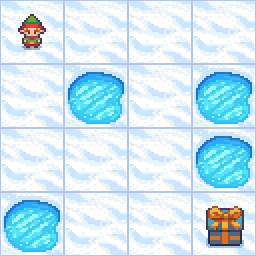

In [18]:


from IPython.display import Image
Image('./content/replay.gif')

### Conclusiones   

- Este proceso de aprendizaje es costoso para el agente, sobre todo en las primeras iteraciones, ya que para converger a la política óptima, cada para estado-acción se visita con frecuencia.
- También reseñar el hecho de que, durante el entrenamiento, este algoritmo siempre converge a la política óptima.
- En este tipo de aprendizaje, la política que se actualiza es diferente a la política de comportamiento(acción) y por ello se denomina algoritmo "off-policy".
- Para actuar en entormos más grandes, será necesario disponer de una tabla Q de estados y acciones muchísimo mayor, con requisitos de memoria y computación más elevados para lograr un buen entrenamiento. A tal efecto, tenemos el **Deep Q-Learning**, en el que dicha tabla es sustituida por una red neuronal capaz de manejar estos entornos y sus estados y acciones.